# AI CODE:

🔥 当前运行设备: [RocmDevice(id=0)]
🚀 开始模拟...
✅ 模拟完成！耗时: 1.8590 秒
🎨 正在绘图...
🖼️ 图片已保存为 'nbody_gpu_result.png'


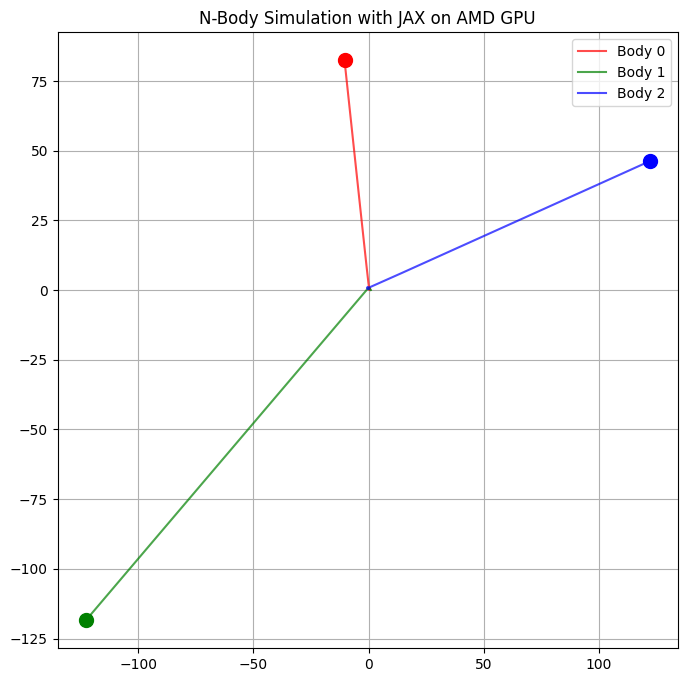

In [1]:
import jax
import jax.numpy as jnp
from jax import grad, jit
import matplotlib.pyplot as plt
import time

# ⬇️ 昨天加了这行强制用CPU，现在你环境好了，把这行删掉或注释掉！让显卡跑！
#jax.config.update("jax_platform_name", "cpu") 

# 打印一下，看看是不是真的识别到了 AMD 显卡 (ROCm)
print(f"🔥 当前运行设备: {jax.devices()}")

def potential(pos):
    """计算引力势能"""
    # 向量化计算所有点对之间的距离
    delta = pos[:, None, :] - pos[None, :, :]
    dist = jnp.sqrt(jnp.sum(delta**2, axis=-1) + 1e-10) # 加个极小值防止除零
    
    # 避免自己对自己产生引力 (对角线设为无穷大或在势能中处理)
    # 这里用一个简单的 trick：把对角线上的 0 距离加上一个 identity matrix
    mask = jnp.eye(dist.shape[0])
    return -0.5 * jnp.sum(1.0 / (dist + mask))

# ✨ JAX 的魔法：自动求导 (grad) 算出受力，即势能的负梯度
# ✨ JAX 的魔法：即时编译 (jit) 让这个函数在显卡上飞快运行
step_fn = jit(grad(lambda p: -potential(p)))

def run_simulation():
    # 初始化三个天体的位置 (x, y)
    pos = jnp.array([[0.3, 0.2], [1.0, 0.0], [-0.5, 1.0]])
    # 初始化速度
    vel = jnp.array([[0.0, 0.0], [0.1, 0.5], [-0.5, -0.2]])
    
    dt = 0.01
    traj = []
    
    print("🚀 开始模拟...")
    start_time = time.time()
    
    # 模拟 3000 步
    for _ in range(3000):
        force = step_fn(pos)
        # 半隐式欧拉积分 (Semi-implicit Euler)
        vel = vel + force * dt
        pos = pos + vel * dt
        traj.append(pos)
        
    end_time = time.time()
    print(f"✅ 模拟完成！耗时: {end_time - start_time:.4f} 秒")
    return jnp.array(traj)

# 运行
traj = run_simulation()

# 画图
print("🎨 正在绘图...")
plt.figure(figsize=(8, 8))
colors = ['r', 'g', 'b']
for i in range(3):
    plt.plot(traj[:, i, 0], traj[:, i, 1], color=colors[i], label=f'Body {i}', alpha=0.7)
    plt.scatter(traj[-1, i, 0], traj[-1, i, 1], color=colors[i], s=100) # 画出终点

plt.title("N-Body Simulation with JAX on AMD GPU")
plt.legend()
plt.grid(True)
plt.savefig("nbody_gpu_result.png")
print("🖼️ 图片已保存为 'nbody_gpu_result.png'")

# Try to ramake the code

In [ ]:
import jax
import jax.numpy as jnp
from jax import grad, jit

